In [1]:
import numpy as np
from material_models import GOH, MR, HGO, Fung, neoHook
import pickle
import matplotlib.pyplot as plt

In [2]:
# For P1C1:
GOH_params = [1.02356332e-02, 5.13664702e-01, 5.91491834e+01, 2.74447648e-01, 1.57079633e+00]
#MR_params  = [0.,         0.,         0.14424528] #P1C1 params
MR_params = [0.1, 0.5, 0] #Random params for testing
HGO_params = [0.012902496702913772,0.01724173170395558,14.00442692847235,2.110210658359853]
Fung_params= [0.0024147281291801714,-1.74859889140465,-21.453946421295953,49.84357587843394]
neoHook_params = [0.04902344]
path = 'training_data/P1C1'

## Linear grid

In [3]:
res = 30

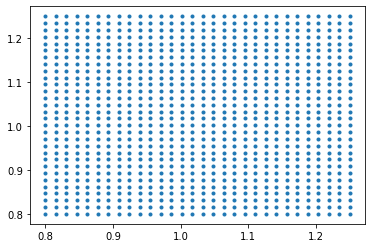

In [4]:
#linscale data
lm = np.linspace(0.8,1.25,res)
#lm = np.linspace(1,1.25,res)
lm1,lm2 = np.meshgrid(lm,lm)
lm1 = lm1.flatten()
lm2 = lm2.flatten()
lm = np.array([lm2, lm1]).T
plt.scatter(lm[:,0],lm[:,1],marker='.')

## Logarithmic Grid

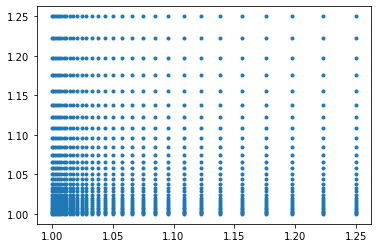

In [5]:
lm = (np.logspace(0,np.log10(26),res)-1)/100+1
lm1,lm2 = np.meshgrid(lm,lm)
lm1 = lm1.flatten()
lm2 = lm2.flatten()
lm = np.array([lm2, lm1]).T
plt.scatter(lm[:,0],lm[:,1],marker='.')

## Logarithmic Grid 2

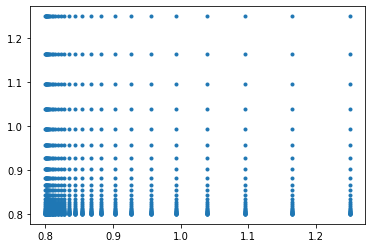

In [6]:
#lm = (np.logspace(0,np.log10(251),res)-1)/1000+1
lm = (np.logspace(0,np.log10(451),res)-1)/1000+0.8
lm1,lm2 = np.meshgrid(lm,lm)
lm1 = lm1.flatten()
lm2 = lm2.flatten()
lm = np.array([lm2, lm1]).T
plt.scatter(lm[:,0],lm[:,1],marker='.')

In [7]:
lm = lm[1:,:] #Remove the first point because it results in inf when I take its log

In [8]:
GOH_MM  = GOH(GOH_params)
MR_MM   = MR(MR_params)
HGO_MM  = HGO(HGO_params)
Fung_MM = Fung(Fung_params)
neoHook_MM = neoHook(neoHook_params)

In [9]:
sigma_GOH  = GOH_MM.sigma(lm)
sigma_MR   = MR_MM.sigma(lm)
sigma_HGO  = HGO_MM.sigma(lm)
sigma_Fung = Fung_MM.sigma(lm)
sigma_neoHook = neoHook_MM.sigma(lm)

In [10]:
with open(path+'_GOH.npy','wb') as f:
    np.save(f, [lm, np.array([sigma_GOH[:,0,0], sigma_GOH[:,1,1]]).T])
with open(path+'_MR.npy','wb') as f:
    np.save(f, [lm, np.array([sigma_MR[:,0,0], sigma_MR[:,1,1]]).T])
with open(path+'_HGO.npy','wb') as f:
    np.save(f, [lm, np.array([sigma_HGO[:,0,0], sigma_HGO[:,1,1]]).T])
with open(path+'_Fung.npy','wb') as f:
    np.save(f, [lm, np.array([sigma_Fung[:,0,0], sigma_Fung[:,1,1]]).T])
with open(path+'_neoHook.npy','wb') as f:
    np.save(f, [lm, np.array([sigma_neoHook[:,0,0], sigma_neoHook[:,1,1]]).T])